In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3


In [4]:
con = sqlite3.connect('../nokia.db')
df = pd.read_sql_query('SELECT * FROM Makkah_5g', con)
con.close()
display(df.head())

,Id,Phone,Bin Time Stamp,Latitude,Longitude,Nemo Data Connection Attempt - HTTP,Nemo Data Connection Success,Nemo Data Connection Disconnect,Nemo Data Transfer Fail - HTTP,Nemo Data Connection Dropped,...,Audio Quality.POLQA Downlink MOS-POLQA SWB,Data Throughput-Physical DSCH Throughput (kbps),PCell-Strongest Serving PCell Avg DL PRB,5G NR-NR Best SS-RSRP,5G NR-NR PDCP downlink throughput (Mbps),5G NR-NR Best SS-SINR,NR-ARFCN-SCG PS Cell,NR Best Serving PCI for selected set-SCG PS Cell,Common Metrics-Band Info,Common Metrics-Protocol
0,1,1,06/18/2024 14:43:34.000,21.357107,39.830204,Nemo Data Connection Attempt - HTTP- 1,Nemo Data Connection Success- 1,0,0,0,...,None,1.39,2.67,NaN,NaN,NaN,NaN,NaN,LTE IMT 2100 - Band 1,LTE
1,2,1,06/18/2024 14:43:36.000,21.357109,39.830204,Nemo Data Connection Attempt - HTTP- 1,Nemo Data Connection Success- 1,0,0,0,...,None,13552.24,17.25,-78.50,65.045551,19.45,643296.0,820.0,LTE IMT 2100 - Band 1,EN-DC
2,3,1,06/18/2024 14:43:38.000,21.357109,39.830204,Nemo Data Connection Attempt - HTTP- 1,Nemo Data Connection Success- 1,0,0,0,...,None,71423.05,19.75,-79.80,316.771094,16.38,643296.0,820.0,LTE IMT 2100 - Band 1,EN-DC
3,4,1,06/18/2024 14:43:40.000,21.357109,39.830204,Nemo Data Connection Attempt - HTTP- 1,Nemo Data Connection Success- 1,0,0,0,...,None,67825.94,22.25,-80.05,355.659812,17.10,643296.0,820.0,LTE IMT 2100 - Band 1,EN-DC
4,5,1,06/18/2024 14:43:42.000,21.357109,39.830204,Nemo Data Connection Attempt - HTTP- 1,0,0,0,0,...,None,62527.23,26.00,-79.95,354.720813,20.08,643296.0,820.0,LTE IMT 2100 - Band 1,EN-DC


In [6]:
#visualize columns
print(df.columns)

Index(['Id', 'Phone', 'Bin Time Stamp', 'Latitude', 'Longitude',
       'Nemo Data Connection Attempt - HTTP', 'Nemo Data Connection Success',
       'Nemo Data Connection Disconnect', 'Nemo Data Transfer Fail - HTTP',
       'Nemo Data Connection Dropped',
       'Data Throughput-RLC DL Throughput (kbps)',
       'Serving Channel Info-DL EARFCN', 'Serving Cell Info-Serving PCI',
       'RSRP (d Bm)-Dominant RSRP (d Bm) ', 'Common-Protocol',
       'Serving RS Info-NR Best SS-RSRP', 'Serving RS Info-NR Best SS-SINR',
       'Data Throughput-NR PDCP downlink throughput (Mbps)',
       'NR Best Serving PCI for selected set-199', 'NR-ARFCN-199',
       'NR PDSCH MCS index for CW0-199', 'NR PDSCH modulation for CW0-199',
       'GSM Cell Identity-GSM Serving Cell Id',
       'Serving RS Info-Serving RSRP (d Bm)',
       'Serving RS Info-Serving RS CINR (d B)',
       'Serving RS Info-Serving RSRQ (d B)',
       'Audio Quality.POLQA Downlink MOS-POLQA SWB',
       'Data Throughput-Physical 

In [5]:
# Check for missing values
print(df.isnull().sum())

Id                                                        0
Phone                                                     0
Bin Time Stamp                                            0
Latitude                                                  0
Longitude                                                 0
Nemo Data Connection Attempt - HTTP                       0
Nemo Data Connection Success                              0
Nemo Data Connection Disconnect                           0
Nemo Data Transfer Fail - HTTP                            0
Nemo Data Connection Dropped                              0
Data Throughput-RLC DL Throughput (kbps)                 47
Serving Channel Info-DL EARFCN                           23
Serving Cell Info-Serving PCI                            23
RSRP (d Bm)-Dominant RSRP (d Bm)                         25
Common-Protocol                                           0
Serving RS Info-NR Best SS-RSRP                         715
Serving RS Info-NR Best SS-SINR         

In [13]:
# Get basic statistics
print(df.describe(include='all'))
print(df.info())

                  Id    Phone           Bin Time Stamp      Latitude  \
count   20274.000000  20274.0                    20274  20274.000000   
unique           NaN      NaN                    20274           NaN   
top              NaN      NaN  06/18/2024 14:43:34.000           NaN   
freq             NaN      NaN                        1           NaN   
mean    10137.500000      1.0                      NaN     21.437088   
std      5852.744015      0.0                      NaN      0.053308   
min         1.000000      1.0                      NaN     21.326482   
25%      5069.250000      1.0                      NaN     21.397290   
50%     10137.500000      1.0                      NaN     21.438595   
75%     15205.750000      1.0                      NaN     21.468704   
max     20274.000000      1.0                      NaN     21.601663   

           Longitude Nemo Data Connection Attempt - HTTP  \
count   20274.000000                               20274   
unique         

Network performance Kpis:

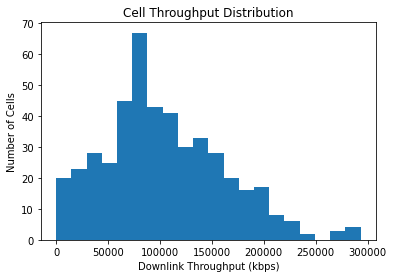

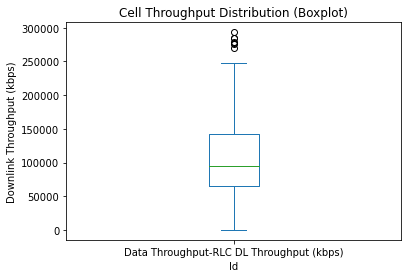

In [18]:
# Group data by cell ID and calculate average throughput
cell_throughput = df.groupby('Serving Cell Info-Serving PCI')['Data Throughput-RLC DL Throughput (kbps)'].mean()
# Histogram
cell_throughput.plot.hist(bins=20)  # Adjust the number of bins as needed
plt.xlabel('Downlink Throughput (kbps)')
plt.ylabel('Number of Cells')
plt.title('Cell Throughput Distribution')
plt.show()

# Boxplot
cell_throughput.plot(kind='box')
plt.xlabel('Id')
plt.ylabel('Downlink Throughput (kbps)')
plt.title('Cell Throughput Distribution (Boxplot)')
plt.show()


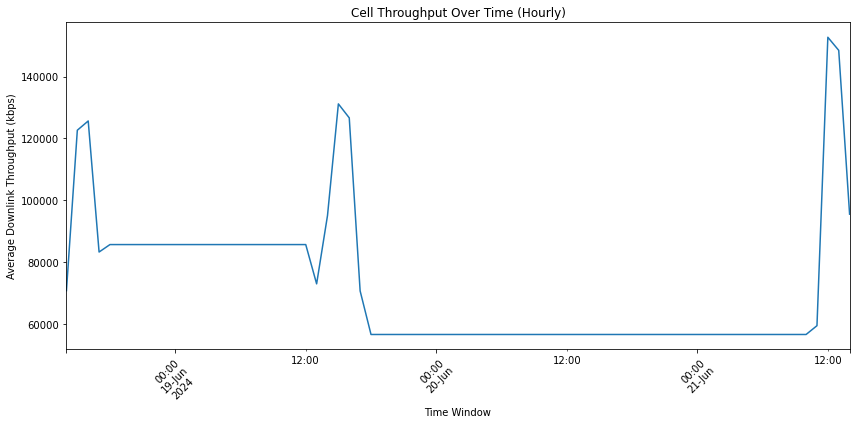

In [15]:
df["Time Window"] = pd.to_datetime(df["Bin Time Stamp"])

# Resample data by hour and calculate average throughput
hourly_throughput = df.resample("H", on="Time Window")["Data Throughput-RLC DL Throughput (kbps)"].mean()

# Handle potential missing data for specific hours
# (Optional, comment out if you don't expect missing data)
hourly_throughput = hourly_throughput.fillna(method='ffill')  # Forward fill missing values

# Plot the hourly throughput
plt.figure(figsize=(12, 6))  
hourly_throughput.plot(kind="line", style='-')
plt.xlabel("Time Window")
plt.ylabel("Average Downlink Throughput (kbps)")
plt.title("Cell Throughput Over Time (Hourly)")

# Ensure all hours are displayed on the x-axis
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

Signal strength distribution:

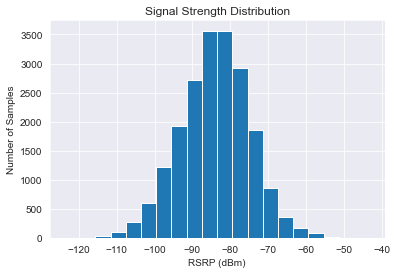

In [8]:
df["Serving RS Info-Serving RSRP (d Bm)"].plot.hist(bins=20)
plt.xlabel("RSRP (dBm)")
plt.ylabel("Number of Samples")
plt.title("Signal Strength Distribution")
plt.show()

Call quality kpis:

In [17]:
df["POLQA Downlink MOS-POLQA SWB"].plot.hist(bins=5)  # Adjust the number of bins as needed
plt.xlabel("RSRQ Score")
plt.ylabel("Number of Calls")
plt.title("Call Quality Distribution (POLQA)")
plt.show()


KeyError: 'POLQA Downlink MOS-POLQA SWB'

Network Utilization KPIs:

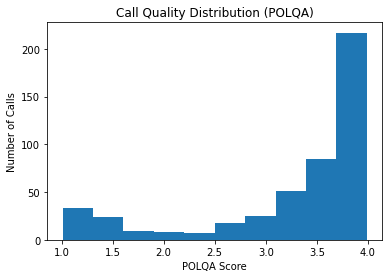

In [10]:
ndf = df[df["POLQA Downlink MOS-POLQA SWB"] < 4]["POLQA Downlink MOS-POLQA SWB"].plot.hist()
plt.xlabel("POLQA Score")
plt.ylabel("Number of Calls")
plt.title("Call Quality Distribution (POLQA)")
plt.show()
